In [1]:
import sklearn_crfsuite
from sklearn_crfsuite import scorers, CRF
from sklearn_crfsuite import metrics
from sklearn_crfsuite.metrics import flat_classification_report
import pandas as pd
import numpy as np
import imp, sys
sys.path.append('./src/')
import feature_utils
import seaborn as sns
import doc_utils_clean as doc_utils
import matplotlib.pyplot as plt
from matplotlib import rcParamsDefault
import defines

In [2]:
imp.reload(feature_utils)

<module 'feature_utils' from './src/feature_utils.py'>

In [42]:
import glob
import os
import pandas as pd   
sent_tokens_db = pd.concat(map(pd.read_csv, glob.glob(os.path.join('dataframes', "sent_tokens_db_*.csv"))))
sent_tokens_db.reset_index(drop=True, inplace=True)
sent_num = sent_tokens_db['sent_idx'].max()

In [3]:
take_columns = ['sent_len','first_sent_in_nar','last_sent_in_nar','is_client','is_nar']

In [43]:
imp.reload(doc_utils)
!pwd
sent_db = pd.read_csv("./dataframes/sent_db.csv",usecols=take_columns,nrows=sent_num+1)

/scratch/sim_reg6/users/zsofya/classroom/MSc/personal_study/thesis


In [44]:
sent_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2648 entries, 0 to 2647
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   is_nar             2648 non-null   float64
 1   sent_len           2648 non-null   float64
 2   first_sent_in_nar  2648 non-null   bool   
 3   last_sent_in_nar   2648 non-null   bool   
 4   is_client          2648 non-null   int64  
dtypes: bool(2), float64(2), int64(1)
memory usage: 67.4 KB


In [10]:
sent_tokens_db_0 = pd.read_csv("./dataframes/sent_tokens_db_1.0.csv")
sent_tokens_db_0

,FROM,sent_idx,TO,FORM,LEMMA,CPOSTAG,POSTAG,f_gen,f_num,FEATS,TOKEN,f_suf_gen,f_suf_num,f_suf_per,f_per,f_tense
0,0,0.000000,1,טוב,טוב,NNT,NNT,M,S,gen=M|num=S,1,NaN,NaN,NaN,NaN,NaN
1,1,0.000000,2,אהלן,אהלן,INTJ,INTJ,NaN,NaN,_,2,NaN,NaN,NaN,NaN,NaN
2,2,0.000000,3,נ,נ,NNP,NNP,M,S,gen=F|gen=M|num=S,3,NaN,NaN,NaN,NaN,NaN
3,0,1.000000,1,היי,הי,INTJ,INTJ,NaN,NaN,_,1,NaN,NaN,NaN,NaN,NaN
4,1,1.000000,2,מה,מה,QW,QW,NaN,NaN,_,2,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3133,2,300.000000,3,סיפור,סיפור,NN,NN,M,S,gen=M|num=S,3,NaN,NaN,NaN,NaN,NaN
3134,3,300.000000,4,ה,ה,DEF,DEF,NaN,NaN,_,4,NaN,NaN,NaN,NaN,NaN
3135,4,300.000000,5,זה,זה,PRP,PRP,M,S,gen=M|num=S|per=3,4,NaN,NaN,NaN,3,NaN
3136,5,300.000000,6,של,של,POS,POS,NaN,NaN,_,5,NaN,NaN,NaN,NaN,NaN


In [45]:
sent_tokens_db[3137:3144]

,FROM,sent_idx,TO,FORM,LEMMA,CPOSTAG,POSTAG,f_gen,f_num,FEATS,TOKEN,f_suf_gen,f_suf_num,f_suf_per,f_per,f_tense
3137,6,300.000000,7,גבולות,גבול,NN,NN,M,P,gen=M|num=P,6,NaN,NaN,NaN,NaN,NaN
3138,0,301.000000,1,אמ,אמ,NNP,NNP,M,S,gen=F|gen=M|num=S,1,NaN,NaN,NaN,NaN,NaN
3139,0,302.000000,1,כאילו,כאילו,CC,CC,NaN,NaN,_,1,NaN,NaN,NaN,NaN,NaN
3140,1,302.000000,2,ב,ב,PREPOSITION,PREPOSITION,NaN,NaN,_,2,NaN,NaN,NaN,NaN,NaN
3141,2,302.000000,3,ענייני,עניין,NNT,NNT,M,P,gen=M|num=P,2,NaN,NaN,NaN,NaN,NaN
3142,3,302.000000,4,כמובן,כמובן,RB,RB,NaN,NaN,_,3,NaN,NaN,NaN,NaN,NaN
3143,4,302.000000,5,זה,זה,PRP,PRP,M,S,gen=M|num=S|per=3,4,NaN,NaN,NaN,3,NaN


In [28]:
sent_tokens_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41364 entries, 0 to 41363
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   FROM       41364 non-null  int64  
 1   sent_idx   41364 non-null  float64
 2   TO         41364 non-null  int64  
 3   FORM       41364 non-null  object 
 4   LEMMA      41364 non-null  object 
 5   CPOSTAG    41364 non-null  object 
 6   POSTAG     41364 non-null  object 
 7   f_gen      19868 non-null  object 
 8   f_num      19868 non-null  object 
 9   FEATS      41364 non-null  object 
 10  TOKEN      41364 non-null  int64  
 11  f_suf_gen  333 non-null    object 
 12  f_suf_num  333 non-null    object 
 13  f_suf_per  333 non-null    float64
 14  f_per      11860 non-null  object 
 15  f_tense    2369 non-null   object 
dtypes: float64(2), int64(3), object(11)
memory usage: 5.0+ MB


In [29]:
columns_to_count = ['POSTAG','f_gen','f_num','f_suf_gen','f_suf_num','f_suf_per','f_per','f_tense']
sent_tokens_dummies =pd.get_dummies(sent_tokens_db,columns=columns_to_count)

In [30]:
sent_tokens_dummies

,FROM,sent_idx,TO,FORM,LEMMA,CPOSTAG,FEATS,TOKEN,POSTAG_ADVERB,POSTAG_AT,...,f_suf_per_2.0,f_suf_per_3.0,f_per_1,f_per_2,f_per_3,f_per_A,f_tense_BEINONI,f_tense_FUTURE,f_tense_IMPERATIVE,f_tense_PAST
0,0,0.000000,1,טוב,טוב,NNT,gen=M|num=S,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0.000000,2,אהלן,אהלן,INTJ,_,2,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0.000000,3,נ,נ,NNP,gen=F|gen=M|num=S,3,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.000000,1,היי,הי,INTJ,_,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1.000000,2,מה,מה,QW,_,2,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41359,1,2099.000000,2,מיני,מין,NNT,gen=M|num=P,2,0,0,...,0,0,0,0,0,0,0,0,0,0
41360,0,2100.000000,1,בעצם,בעצם,RB,_,1,0,0,...,0,0,0,0,0,0,0,0,0,0
41361,1,2100.000000,2,לא,לא,RB,_,2,0,0,...,0,0,0,0,0,0,0,0,0,0
41362,2,2100.000000,3,נפגשנו,נפגש,VB,gen=F|gen=M|num=P|per=1|tense=PAST,3,0,0,...,0,0,1,0,0,0,0,0,0,1


In [71]:
count_db = sent_tokens_dummies.groupby('sent_idx').sum()
count_db['TOKEN'] = sent_tokens_dummies.groupby('sent_idx')['TOKEN'].max()

In [72]:
count_db

,FROM,TO,TOKEN,POSTAG_ADVERB,POSTAG_AT,POSTAG_BN,POSTAG_BNT,POSTAG_CC,POSTAG_CD,POSTAG_CDT,...,f_suf_per_2.0,f_suf_per_3.0,f_per_1,f_per_2,f_per_3,f_per_A,f_tense_BEINONI,f_tense_FUTURE,f_tense_IMPERATIVE,f_tense_PAST
sent_idx,,,,,,,,,,,,,,,,,,,,,
0.000000,3,6,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1.000000,6,10,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2.000000,3,6,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3.000000,3,6,2,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4.000000,136,153,16,0,0,0,0,1,0,0,...,0,0,0,0,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2643.000000,31878,32131,187,0,9,10,0,8,8,0,...,0,0,22,3,21,11,1,6,0,5
2644.000000,496,528,19,0,0,0,0,0,1,0,...,0,0,3,0,3,0,0,0,0,2
2645.000000,1225,1275,35,0,1,0,0,0,0,0,...,0,0,4,1,2,1,0,0,0,4


## Calculate sentenses similarity (on fasttext sentense embeddings)

In [86]:
sent_vec_db=pd.read_csv("./dataframes/sentVec_merged.csv");
sent_vec_db.drop(['is_nar','sent_len'],inplace=True,axis=1)

In [143]:
sent_vec_db

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,-0.114521,0.000108,0.036471,-0.024207,0.002051,0.014730,-0.104159,0.058651,0.005404,0.056529,...,-0.028992,0.024537,-0.002414,0.039244,-0.094238,0.025045,0.097398,-0.004409,0.041561,-0.049388
1,-0.013333,0.000648,0.013545,-0.001843,0.037912,0.044653,-0.033737,0.020353,-0.039255,0.040033,...,-0.060196,0.008632,0.038335,0.013976,-0.062025,-0.025751,-0.032749,0.038144,-0.012054,0.083821
2,-0.049959,0.006207,0.019215,-0.013564,-0.006140,-0.020194,-0.021590,0.033078,0.043775,0.076063,...,-0.006393,0.000760,-0.021449,-0.031051,-0.009857,0.012590,0.040845,-0.031004,0.001470,-0.049673
3,-0.009683,0.047087,0.037459,0.019149,0.005652,-0.042241,0.013978,0.052192,-0.023080,0.002327,...,-0.008517,0.017969,-0.029806,0.033418,-0.029150,0.014673,0.022372,0.058281,0.031803,-0.026994
4,0.060957,0.005640,-0.018319,-0.002478,0.010457,-0.024910,0.091064,0.000475,0.066396,-0.038925,...,-0.004368,0.027183,-0.024806,-0.046600,-0.026737,-0.015007,0.005086,0.030338,0.038523,-0.014919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2834,0.044579,0.024742,0.028893,-0.060388,0.039829,0.025243,-0.117620,-0.028324,0.013425,-0.002992,...,0.009427,0.038958,-0.027126,-0.003454,-0.037883,0.018410,0.046375,0.052125,-0.023152,0.060160
2835,0.017902,0.038459,-0.016246,-0.003681,-0.026354,0.042227,0.019360,0.023875,-0.001420,0.015527,...,-0.000730,0.006619,-0.022408,0.012324,-0.014626,0.004259,0.006237,0.035307,0.027554,-0.016158
2836,0.013650,0.023375,0.017228,0.000760,0.006687,0.010800,-0.005754,0.013923,0.009729,0.018878,...,-0.006892,0.006403,-0.015082,0.006376,-0.010457,0.021521,-0.011850,0.022129,0.016181,0.004594
2837,0.009727,0.017978,0.027529,0.006578,0.020192,-0.020603,0.027635,0.017854,0.040842,0.017801,...,-0.012764,0.023296,-0.019581,-0.002811,-0.012890,0.033547,0.007128,-0.002388,0.006980,-0.007728


In [90]:
from sklearn.metrics.pairwise import cosine_similarity

# simil = cosine_similarity(sent_vec_db.iloc[4,:-2].valuesreshape(1,-1),sent_vec_db.iloc[[0,1,2,5,6,7],:-2].valuesreshape(1,-1))
sent_simil = cosine_similarity(sent_vec_db)

In [94]:
sent_simil

array([[1.        , 0.35044044, 0.63098154, ..., 0.51701221, 0.48082264,
        0.35973763],
       [0.35044044, 1.        , 0.29495854, ..., 0.39837163, 0.35547323,
        0.24976271],
       [0.63098154, 0.29495854, 1.        , ..., 0.49935813, 0.44893847,
        0.39833985],
       ...,
       [0.51701221, 0.39837163, 0.49935813, ..., 1.        , 0.85482523,
        0.45881888],
       [0.48082264, 0.35547323, 0.44893847, ..., 0.85482523, 1.        ,
        0.53513398],
       [0.35973763, 0.24976271, 0.39833985, ..., 0.45881888, 0.53513398,
        1.        ]])

In [47]:
merged_sent_pos =  pd.merge(sent_db,count_db.iloc[:,3:],left_index=True,right_index=True,validate="one_to_one")
merged_sent_pos.describe()

,is_nar,sent_len,is_client,POSTAG_ADVERB,POSTAG_AT,POSTAG_BN,POSTAG_BNT,POSTAG_CC,POSTAG_CD,POSTAG_CDT,...,f_suf_per_2.0,f_suf_per_3.0,f_per_1,f_per_2,f_per_3,f_per_A,f_tense_BEINONI,f_tense_FUTURE,f_tense_IMPERATIVE,f_tense_PAST
count,2648.000000,2648.000000,2648.000000,2648.000000,2648.000000,2648.000000,2648.000000,2648.000000,2648.000000,2648.000000,...,2648.000000,2648.000000,2648.000000,2648.000000,2648.000000,2648.000000,2648.000000,2648.000000,2648.000000,2648.000000
mean,0.373112,54.886329,0.680891,0.010196,0.380287,0.844033,0.011707,0.609894,0.130665,0.009063,...,0.009819,0.082704,1.271903,0.351964,1.905967,0.949018,0.042296,0.181647,0.017749,0.652946
std,0.483723,68.913481,0.466219,0.100480,0.832394,1.383778,0.107584,1.153176,0.468417,0.098693,...,0.106005,0.319903,2.238198,0.823707,2.697687,1.514833,0.224377,0.588143,0.143049,1.234508
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,33.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,70.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,2.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1037.000000,1.000000,1.000000,9.000000,16.000000,1.000000,15.000000,8.000000,2.000000,...,2.000000,4.000000,30.000000,9.000000,29.000000,20.000000,3.000000,8.000000,2.000000,16.000000


In [48]:
col = merged_sent_pos.pop("first_sent_in_nar")
merged_sent_pos.insert(0, col.name, col)
col = merged_sent_pos.pop("last_sent_in_nar")
merged_sent_pos.insert(0, col.name, col)

## Compare features distribution between nar / not_nar

/home/zsofya/jupyter_git/jup-nb-generic/lib/python3.8/site-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


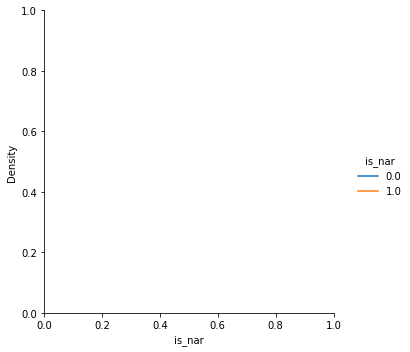

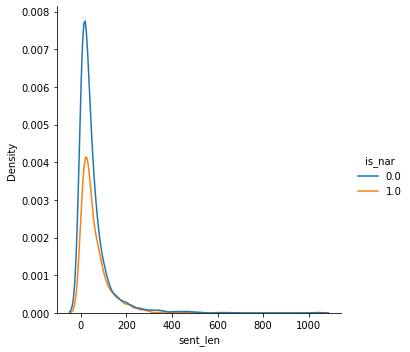

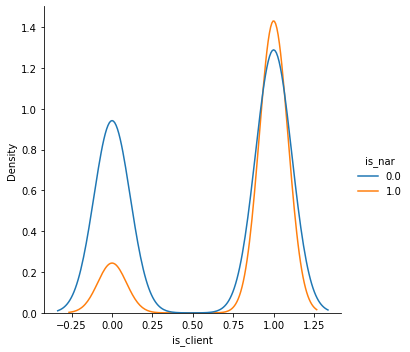

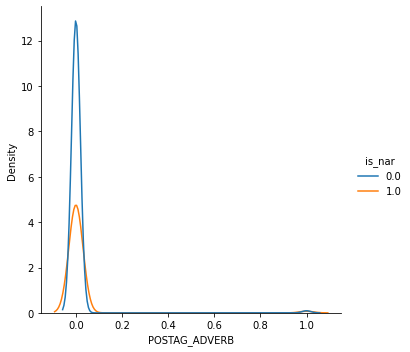

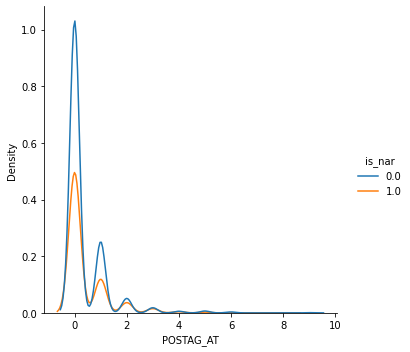

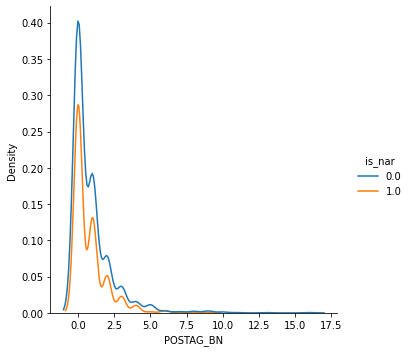

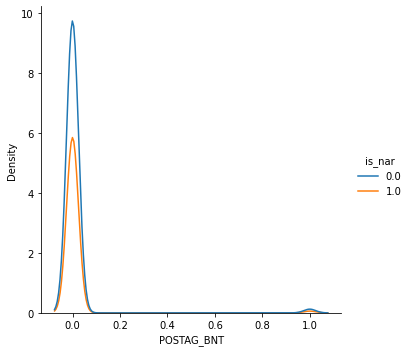

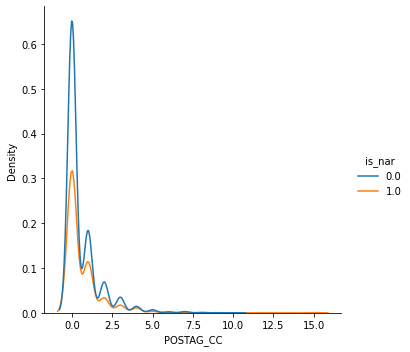

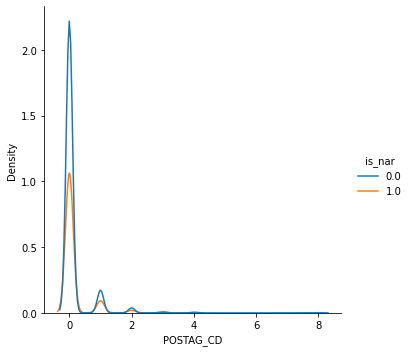

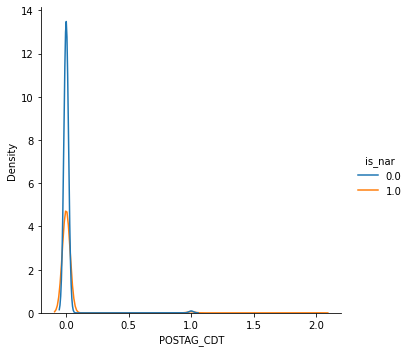

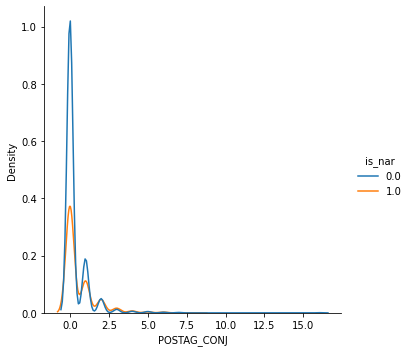

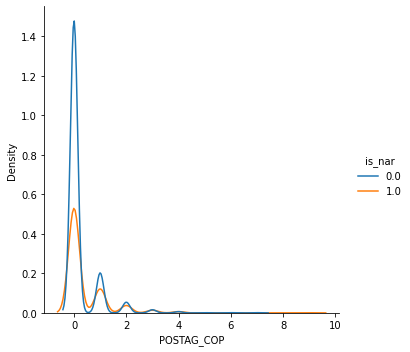

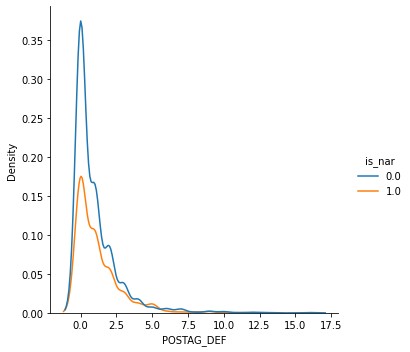

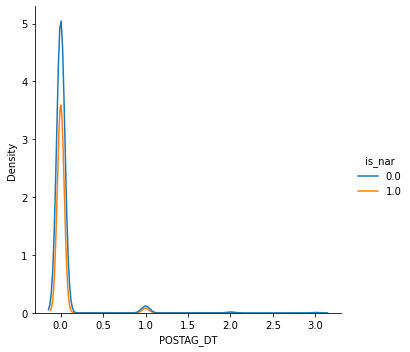

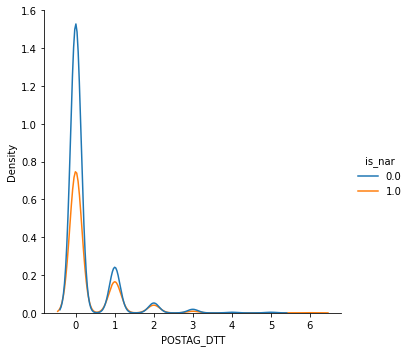

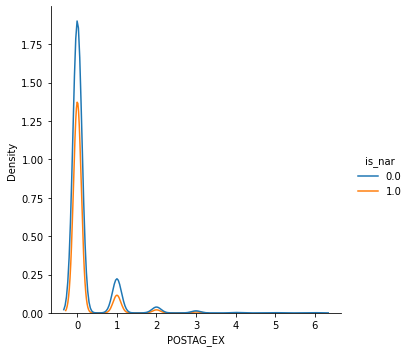

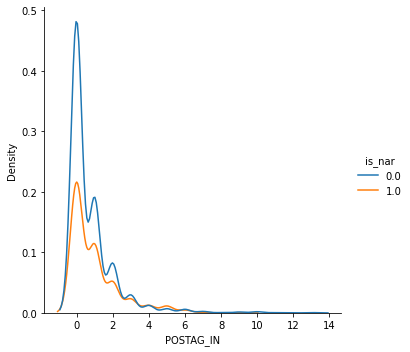

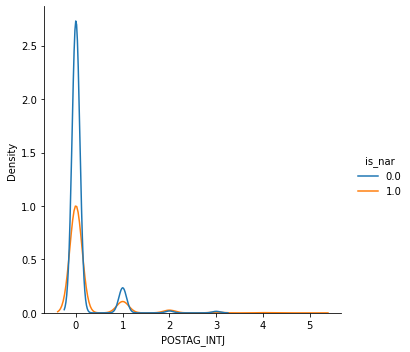

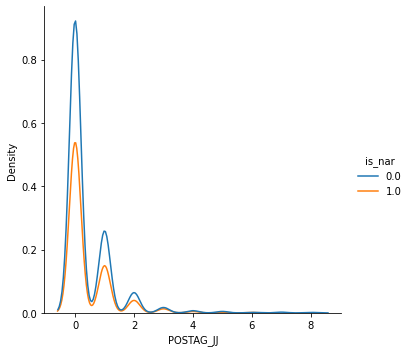

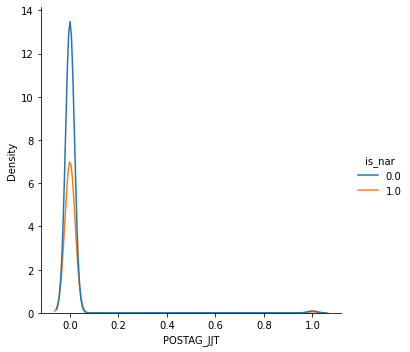

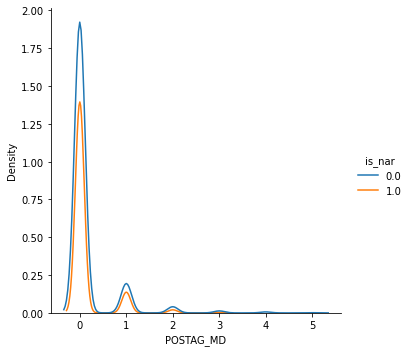

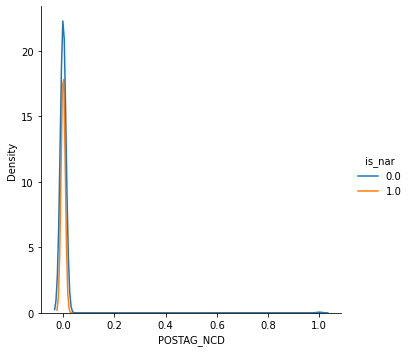

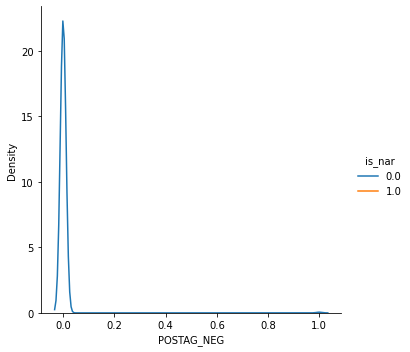

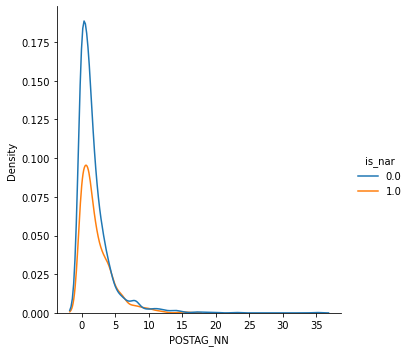

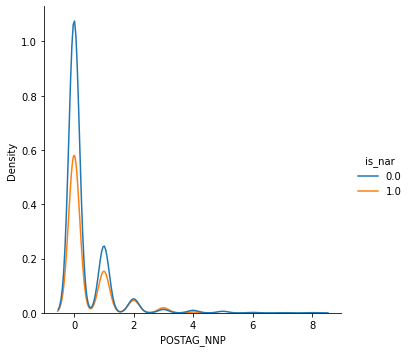

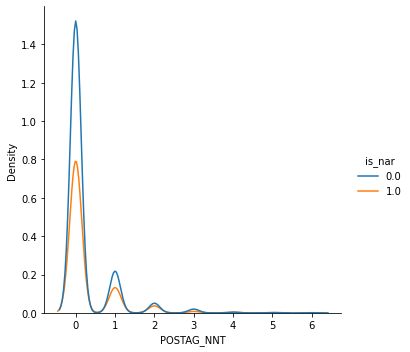

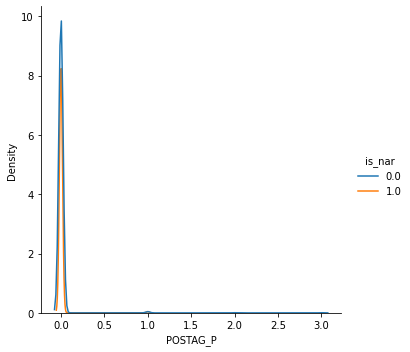

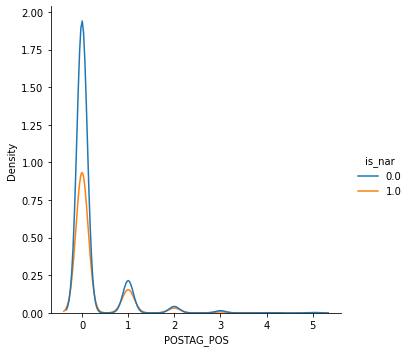

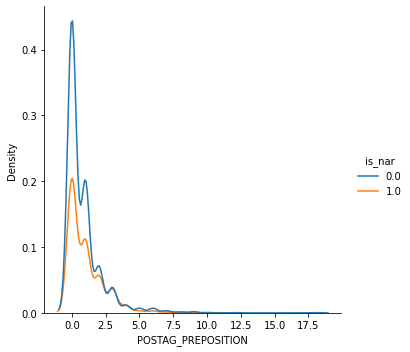

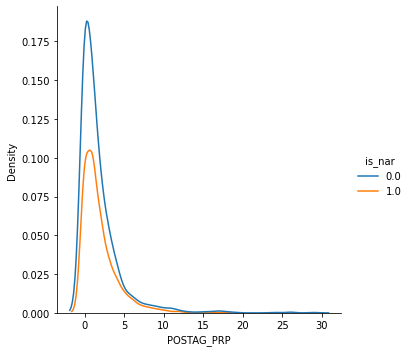

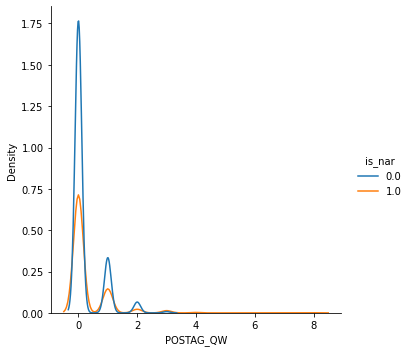

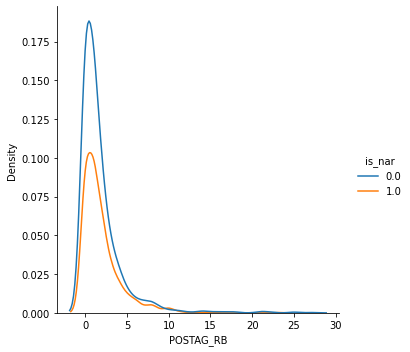

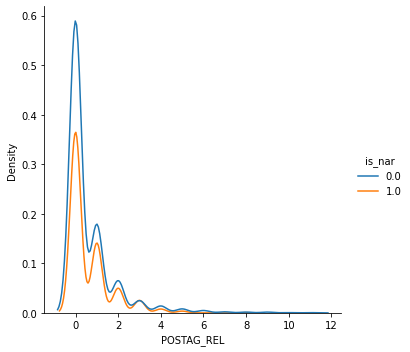

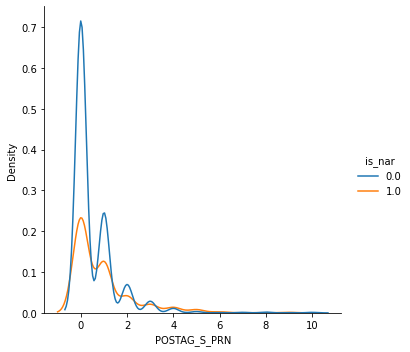

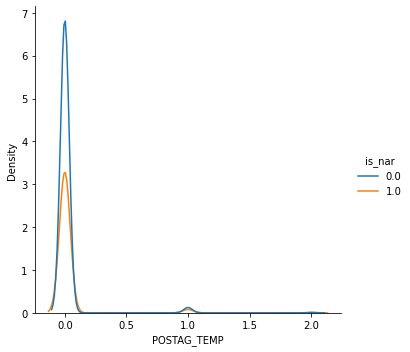

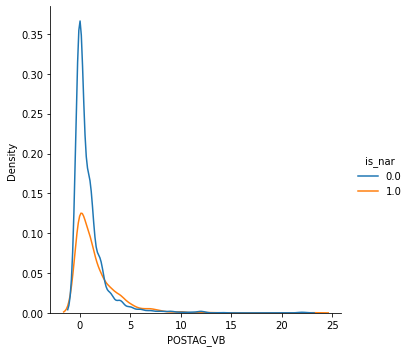

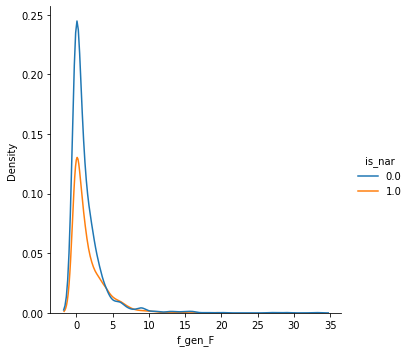

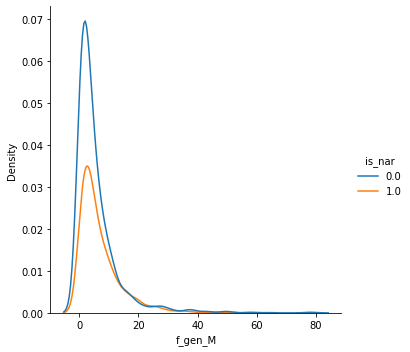

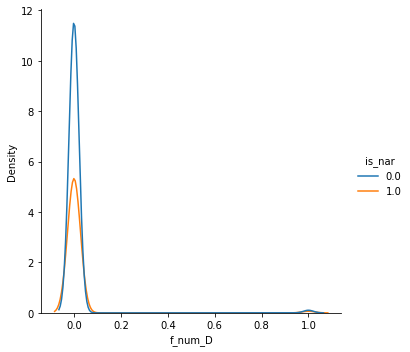

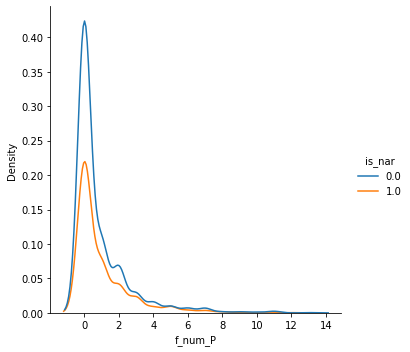

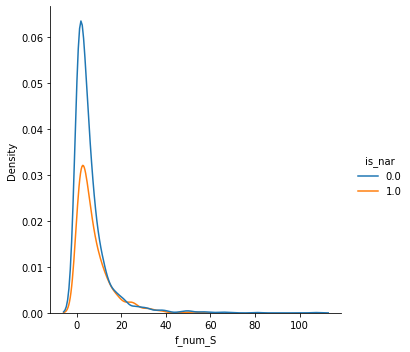

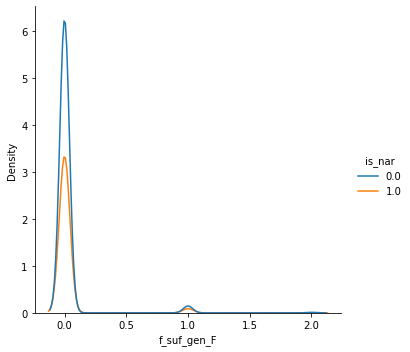

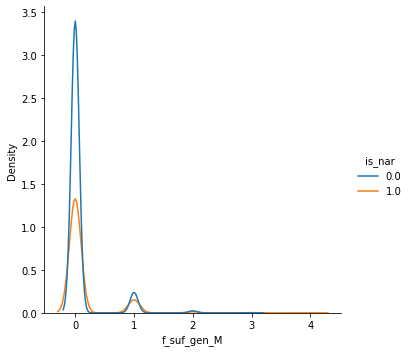

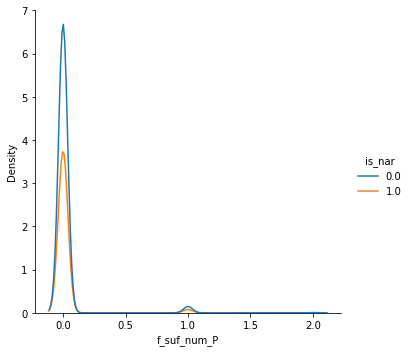

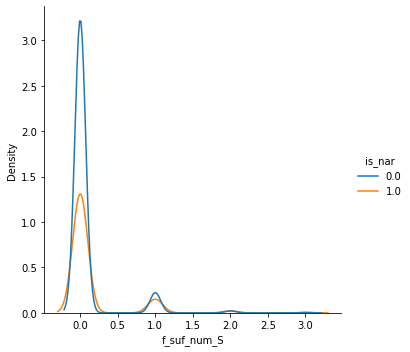

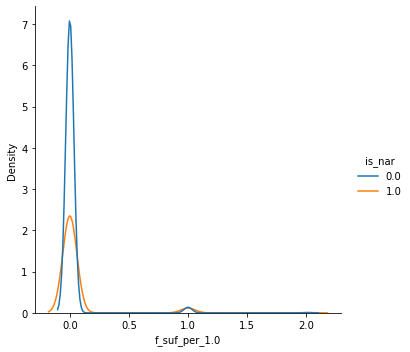

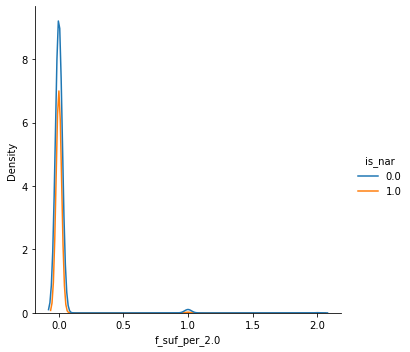

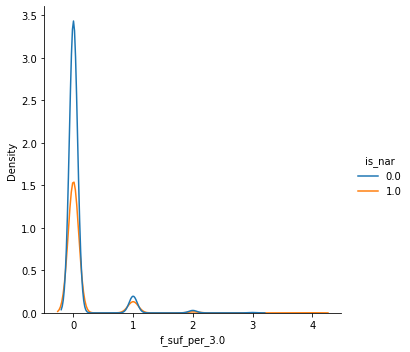

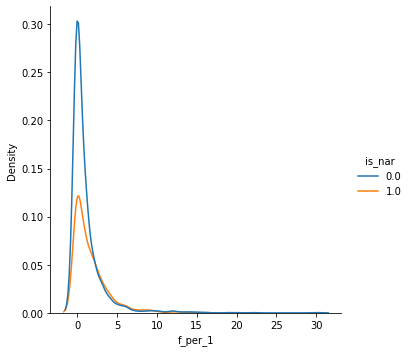

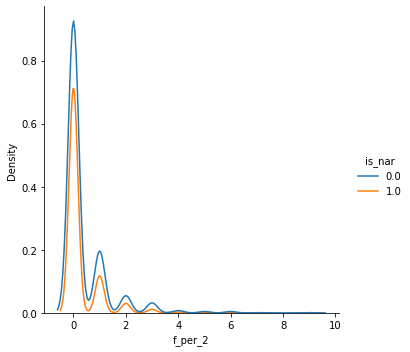

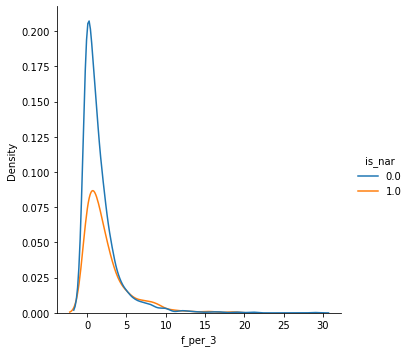

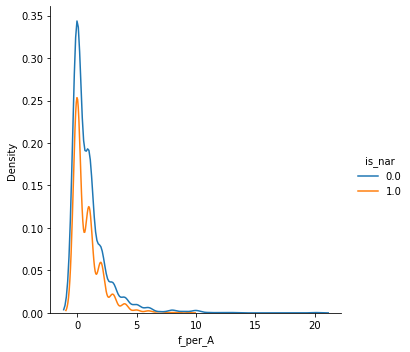

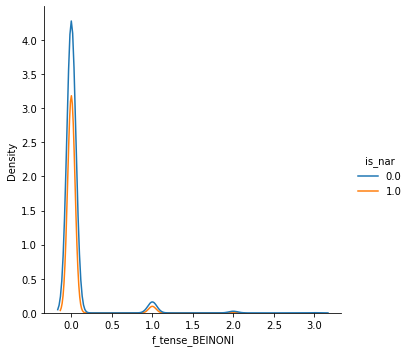

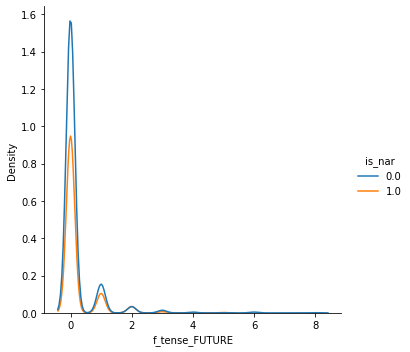

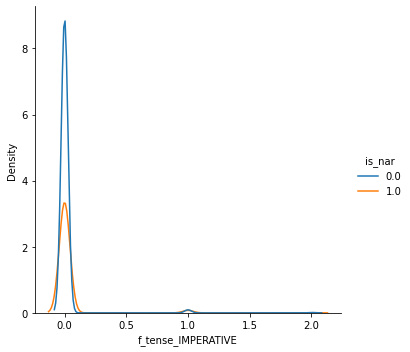

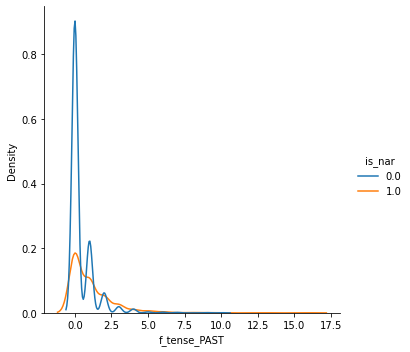

In [49]:
for i,col in enumerate(merged_sent_pos.columns[2:]):
    sns.displot(merged_sent_pos, x=col, hue="is_nar",kind='kde',warn_singular=False)

In [50]:
import scipy.stats as stats
nar = merged_sent_pos[merged_sent_pos['is_nar']==0]
not_nar = merged_sent_pos[merged_sent_pos['is_nar']==1]
def compare_distrib(col):
    u_res = stats.mannwhitneyu(nar[col],not_nar[col], alternative = 'two-sided')
    u_test_db.loc[col,'pvalue'] =  u_res.pvalue
    u_test_db.loc[col,'U'] = u_res.statistic 
    u_test_db.loc[col,'is_diff'] = u_res.pvalue < 0.05
#     if u_res.pvalue < 0.05 :#and u_res.statistic < 105):
#         print ('{} differ {}'.format(col,u_res.statistic))
#     else:
#         print('{} same {}'.format(col,u_res.statistic))# output
# MannwhitneyuResult(statistic=489.5, pvalue=7.004695394561267e-07)

In [51]:
u_test_db = pd.DataFrame(index=merged_sent_pos.columns[8:])

for i,col in enumerate(merged_sent_pos.columns[2:]):
    compare_distrib(col)
u_test_db[u_test_db['is_diff'] == True].sort_values(by=['pvalue'],ascending=True)

,pvalue,U,is_diff
is_nar,0.000000,0.000000,True
is_client,0.000000,593266.000000,True
f_tense_PAST,0.000000,589558.500000,True
POSTAG_VB,0.000000,636079.500000,True
f_per_1,0.000000,650175.500000,True
f_per_3,0.000000,657173.000000,True
POSTAG_CONJ,0.000000,706842.500000,True
POSTAG_S_PRN,0.000000,691960.000000,True
f_num_S,0.000000,678153.500000,True
f_gen_M,0.000000,681393.500000,True


In [98]:
neighbor_radius = 2

In [111]:
def sent2features(sent_idx,idx_in_seq):
    features = {}
    
    for col in merged_sent_pos.columns[3:]:
        features["{}".format(col)]=merged_sent_pos.loc[sent_idx,col]

    if idx_in_seq > 1:
        update = {}
        for col in merged_sent_pos.columns[3:]:
            update["-1:{}".format(col)]=merged_sent_pos.loc[sent_idx-1,col]
        features.update(update)
    else:
        features['BOS'] = True
    
    if idx_in_seq > 2:
        update = {}
        for col in merged_sent_pos.columns[3:]:
            update["-2:{}".format(col)]=merged_sent_pos.loc[sent_idx-2,col]
        features.update(update)
    
    update = {}
    for neighbor_dist in range(1,neighbor_radius+1):
        if idx_in_seq > neighbor_dist - 1:
            update["-{}.sim".format(neighbor_dist)]=sent_simil[sent_idx,sent_idx-neighbor_dist]
        if idx_in_seq < seq_len - neighbor_dist:
            update["+{}.sim".format(neighbor_dist)]=sent_simil[sent_idx,sent_idx+neighbor_dist]

    features.update(update) 
    
    if idx_in_seq < seq_len-1:
        update = {}
        for col in merged_sent_pos.columns[3:]:
            update["+1:{}".format(col)]=merged_sent_pos.loc[sent_idx+1,col]
        features.update(update)
    else:
        features['EOS'] = True

    return features

def sent2label(sent_idx):
    return "{}".format(merged_sent_pos.loc[sent_idx,'is_nar'].astype(bool))


In [167]:
seq_len = 6

def seq2features(first_sent_idx):
    return [sent2features(sent_idx,idx_in_seq) for idx_in_seq,sent_idx in enumerate(np.arange(first_sent_idx,first_sent_idx+seq_len,dtype=int))]
def seq2labels(first_sent_idx):
    return [sent2label(sent_idx) for sent_idx in range(first_sent_idx,first_sent_idx+seq_len)]

In [148]:
merged_sent_pos.index

Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
       ...
       2638, 2639, 2640, 2641, 2642, 2643, 2644, 2645, 2646, 2647],
      dtype='object', length=2648)

## Non-verlapping windows

In [149]:
X = [seq2features(first_sent_idx) for first_sent_idx in merged_sent_pos.index[:-seq_len:seq_len]]
y = [seq2labels(first_sent_idx) for first_sent_idx in merged_sent_pos.index[:-seq_len:seq_len]]


In [150]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)
print( len(X_train),len(X_test))

295 146


In [151]:
from sklearn.model_selection import cross_validate

crf = CRF(
    algorithm='lbfgs',
    c1=0.1,
    c2=0.1,
    max_iterations=100,
#     all_possible_transitions=True,
)
try:
    crf.fit(X_train, y_train)
except AttributeError:
    pass
y_pred = crf.predict(X_test)

In [142]:
labels = list(crf.classes_)
metrics.flat_f1_score(y_test, y_pred,
                      average='weighted', labels=labels)

0.712760272218517

In [130]:
from collections import Counter

def print_transitions(trans_features):
    for (label_from, label_to), weight in trans_features:
        print("%-6s -> %-7s %0.6f" % (label_from, label_to, weight))

print("Top likely transitions:")
print_transitions(Counter(crf.transition_features_).most_common(20))

print("\nTop unlikely transitions:")
print_transitions(Counter(crf.transition_features_).most_common()[-20:])

Top likely transitions:
False  -> False   1.514457
True   -> True    1.169064
False  -> True    -1.241233
True   -> False   -2.574436

Top unlikely transitions:
False  -> False   1.514457
True   -> True    1.169064
False  -> True    -1.241233
True   -> False   -2.574436


## Sliding window - step size = 1 (full overlap)

In [173]:
X = [seq2features(first_sent_idx) for first_sent_idx in merged_sent_pos.index[:-seq_len]]
y = [seq2labels(first_sent_idx) for first_sent_idx in merged_sent_pos.index[:-seq_len]]

In [174]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)
print( len(X_train),len(X_test))

1770 872


In [180]:
from sklearn.model_selection import cross_validate

crf = CRF(
    algorithm='lbfgs',
    c1=0.1,
    c2=0.1,
    max_iterations=100,
#     all_possible_transitions=True,
)
try:
    crf.fit(X_train, y_train)
except AttributeError:
    pass
y_pred = crf.predict(X_test)

In [181]:
labels = list(crf.classes_)
metrics.flat_f1_score(y_test, y_pred,
                      average='weighted', labels=labels)

0.7853602573337594

              precision    recall  f1-score   support

       False       0.84      0.83      0.83      3399
        True       0.69      0.70      0.70      1833

    accuracy                           0.78      5232
   macro avg       0.76      0.77      0.76      5232
weighted avg       0.79      0.78      0.79      5232



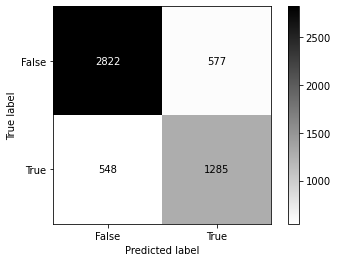

In [182]:
import sklearn_crfsuite
from sklearn_crfsuite import scorers
from sklearn_crfsuite import metrics
from sklearn_crfsuite.utils import flatten


feature_utils.get_prediction_report(flatten(y_test),flatten(y_pred))

In [184]:
def print_state_features(state_features):
    for (attr, label), weight in state_features:
        print("%0.6f %-8s %s" % (weight, label, attr))

print("Top positive:")
print_state_features(Counter(crf.state_features_).most_common(10))

print("\nTop negative:")
print_state_features(Counter(crf.state_features_).most_common()[-10:])

Top positive:
1.073885 False    -1:POSTAG_NCD
0.732556 False    POSTAG_NEG
0.686396 False    f_suf_per_2.0
0.525726 False    +1:POSTAG_NEG
0.420602 False    -1:f_suf_per_2.0
0.413416 False    +1:f_suf_num_P
0.384165 False    -1:POSTAG_NEG
0.382567 False    +1:f_num_D
0.377129 True     is_client
0.365165 True     f_tense_IMPERATIVE

Top negative:
-0.365165 False    f_tense_IMPERATIVE
-0.377129 False    is_client
-0.382567 True     +1:f_num_D
-0.384165 True     -1:POSTAG_NEG
-0.413416 True     +1:f_suf_num_P
-0.420602 True     -1:f_suf_per_2.0
-0.525726 True     +1:POSTAG_NEG
-0.686396 True     f_suf_per_2.0
-0.732556 True     POSTAG_NEG
-1.073885 True     -1:POSTAG_NCD


## Sliding window - step size = 1/2 window

In [168]:
step = int(seq_len/2)
X = [seq2features(first_sent_idx) for first_sent_idx in merged_sent_pos.index[:-seq_len:step]]
y = [seq2labels(first_sent_idx) for first_sent_idx in merged_sent_pos.index[:-seq_len:step]]

In [169]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)
print( len(X_train),len(X_test))

590 291


In [170]:
crf = CRF(
    algorithm='lbfgs',
    c1=0.1,
    c2=0.1,
    max_iterations=100,
#     all_possible_transitions=True,
)
try:
    crf.fit(X_train, y_train)
except AttributeError:
    pass
y_pred = crf.predict(X_test)

0.760364921263774
              precision    recall  f1-score   support

       False       0.79      0.86      0.82      1116
        True       0.71      0.59      0.65       630

    accuracy                           0.77      1746
   macro avg       0.75      0.73      0.74      1746
weighted avg       0.76      0.77      0.76      1746



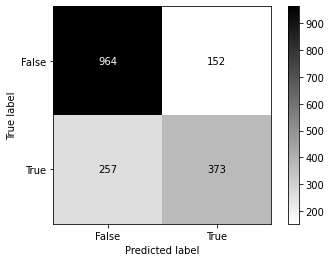

In [172]:
labels = list(crf.classes_)
print(metrics.flat_f1_score(y_test, y_pred,
                      average='weighted', labels=labels))
feature_utils.get_prediction_report(flatten(y_test),flatten(y_pred))

In [88]:
merged_raw =  pd.merge(sent_db[:300],sent_tokens_db,left_index=True,right_index=True,validate="one_to_one")
merged_raw

,is_nar,sent_len,first_sent_in_nar,last_sent_in_nar,is_client,FROM,sent_idx,TO,FORM,LEMMA,...,POSTAG,f_gen,f_num,FEATS,TOKEN,f_suf_gen,f_suf_num,f_suf_per,f_per,f_tense
0,0.000000,10.000000,False,False,0,0,0.000000,1,טוב,טוב,...,NNT,M,S,gen=M|num=S,1,NaN,NaN,NaN,NaN,NaN
1,0.000000,15.000000,False,False,1,1,0.000000,2,אהלן,אהלן,...,INTJ,NaN,NaN,_,2,NaN,NaN,NaN,NaN,NaN
2,0.000000,4.000000,False,False,0,2,0.000000,3,נ,נ,...,NNP,M,S,gen=F|gen=M|num=S,3,NaN,NaN,NaN,NaN,NaN
3,0.000000,8.000000,False,False,0,0,1.000000,1,היי,הי,...,INTJ,NaN,NaN,_,1,NaN,NaN,NaN,NaN,NaN
4,0.000000,73.000000,False,False,1,1,1.000000,2,מה,מה,...,QW,NaN,NaN,_,2,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.000000,32.000000,False,False,0,11,24.000000,12,כאילו,כאילו,...,CC,NaN,NaN,_,9,NaN,NaN,NaN,NaN,NaN
296,0.000000,8.000000,False,False,0,12,24.000000,13,אנחנו,הוא,...,PRP,M,P,gen=F|gen=M|num=P|per=1,10,NaN,NaN,NaN,1,NaN
297,0.000000,34.000000,False,False,0,13,24.000000,14,כמה,כמה,...,DTT,NaN,NaN,_,11,NaN,NaN,NaN,NaN,NaN
298,0.000000,23.000000,False,False,0,14,24.000000,15,אנשים,איש,...,NN,M,P,gen=M|num=P,12,NaN,NaN,NaN,NaN,NaN


In [ ]:
def word2features(sent_idx):
    sent_len = sent_tokens_db[sent_tokens_db['sent_idx']==sent_idx]['TOKEN'].max()
    word_row = sent_tokens_db.query("sent_idx==  @sent_idx and TOKEN == @word_idx")

    features = {
#         'bias': 1.0,
        'word':word_row['LEMMA'].item(),
        'postag': word_row['POSTAG'].item(),
        'gen': word_row['f_suf_gen'].item(),
        'num': word_row['f_suf_num'].item(),
        'suf_per': word_row['f_suf_per'].item(),
        'per': word_row['f_per'].item(),
        'tense': word_row['f_tense'].item(),
    }
    if word_idx > 1:
        one_before_idx = word_idx-1
        word_row = sent_tokens_db.query("sent_idx==  @sent_idx and TOKEN == @one_before_idx")
        features.update({
            '-1:word':word_row['LEMMA'].item(),
        '-1:postag': word_row['POSTAG'].item(),
        '-1:gen': word_row['f_suf_gen'].item(),
        '-1:num':word_row['f_suf_num'].item(),
        '-1:suf_per': word_row['f_suf_per'].item(),
        '-1:per': word_row['f_per'].item(),
        '-1:tense': word_row['f_tense'].item(),
        })
    else:
        features['BOS'] = True
    
    if word_idx > 2:
        two_before_idx = word_idx-2
        word_row = sent_tokens_db.query("sent_idx==  @sent_idx and TOKEN == @two_before_idx")
        features.update({
            '-2:word':word_row['LEMMA'].item(),
        '-2:postag': word_row['POSTAG'].item(),
        '-2:gen':word_row['f_suf_gen'].item(),
        '-2:num':word_row['f_suf_num'].item(),
        '-2:suf_per': word_row['f_suf_per'].item(),
        '-2:per': word_row['f_per'].item(),
        '-2:tense': word_row['f_tense'].item(),
        })

    if word_idx < sent_len:
        one_after_idx = word_idx+1
        word_row =  sent_tokens_db.query("sent_idx==  @sent_idx and TOKEN == @one_after_idx")
        features.update({
            '+1:word':word_row['LEMMA'].item(),
        '+1:postag': word_row['POSTAG'].item(),
        '+1:gen': word_row['f_suf_gen'].item(),
        '+1:num': word_row['f_suf_num'].item(),
        '+1:suf_per': word_row['f_suf_per'].item(),
        '+1:per': word_row['f_per'].item(),
        '+1:tense': word_row['f_tense'].item(),
        })
    else:
        features['EOS'] = True

    return features

In [87]:
merged_count = pd.merge(sent_db[:300],sent_pos_db,left_index=True,right_index=True,validate="one_to_one")
merged_count

,is_nar,sent_len,first_sent_in_nar,last_sent_in_nar,is_client,POSTAG,f_gen,f_num,f_suf_gen,f_suf_num,f_suf_per,f_per,f_tense
0.000000,0.000000,10.000000,False,False,0,3,2,2,0,0,0,0,0
1.000000,0.000000,15.000000,False,False,1,4,1,1,0,0,0,0,0
2.000000,0.000000,4.000000,False,False,0,3,1,1,0,0,0,0,0
3.000000,0.000000,8.000000,False,False,0,3,1,1,1,1,1,0,0
4.000000,0.000000,73.000000,False,False,1,17,7,7,0,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
295.000000,0.000000,32.000000,False,False,0,9,6,6,0,0,0,4,0
296.000000,0.000000,8.000000,False,False,0,4,2,2,0,0,0,2,0
297.000000,0.000000,34.000000,False,False,0,12,5,5,0,0,0,3,1
298.000000,0.000000,23.000000,False,False,0,7,3,3,0,0,0,2,0


In [157]:
merged.describe()

,is_nar,sent_len,is_client,CPOSTAG,POSTAG,f_gen,f_num,f_suf_gen,f_suf_num,f_suf_per,f_per,f_tense
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,0.566667,35.273333,0.763333,10.436667,10.436667,5.043333,5.043333,0.110000,0.110000,0.110000,2.716667,0.616667
std,0.496364,31.243332,0.425746,9.328956,9.328956,4.611472,4.611472,0.380855,0.380855,0.380855,2.721718,0.982994
min,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,13.000000,1.000000,4.000000,4.000000,2.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,1.000000,27.000000,1.000000,8.000000,8.000000,4.000000,4.000000,0.000000,0.000000,0.000000,2.000000,0.000000
75%,1.000000,50.000000,1.000000,14.000000,14.000000,7.000000,7.000000,0.000000,0.000000,0.000000,4.000000,1.000000
max,1.000000,187.000000,1.000000,62.000000,62.000000,30.000000,30.000000,3.000000,3.000000,3.000000,16.000000,6.000000


In [ ]:
sns.pairplot(hue="is_nar", data=merged)

<AxesSubplot:xlabel='is_nar', ylabel='count'>

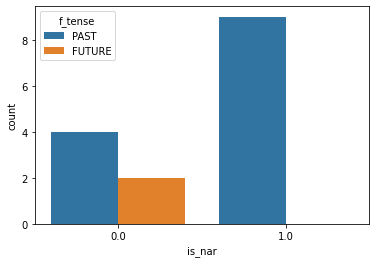

In [77]:
sns.countplot(x='is_nar',hue="f_tense", data=merged_raw)
# g = sns.catplot(x="class", hue="who", col="survived",
#                 data=titanic, kind="count",
#                 height=4, aspect=.7);

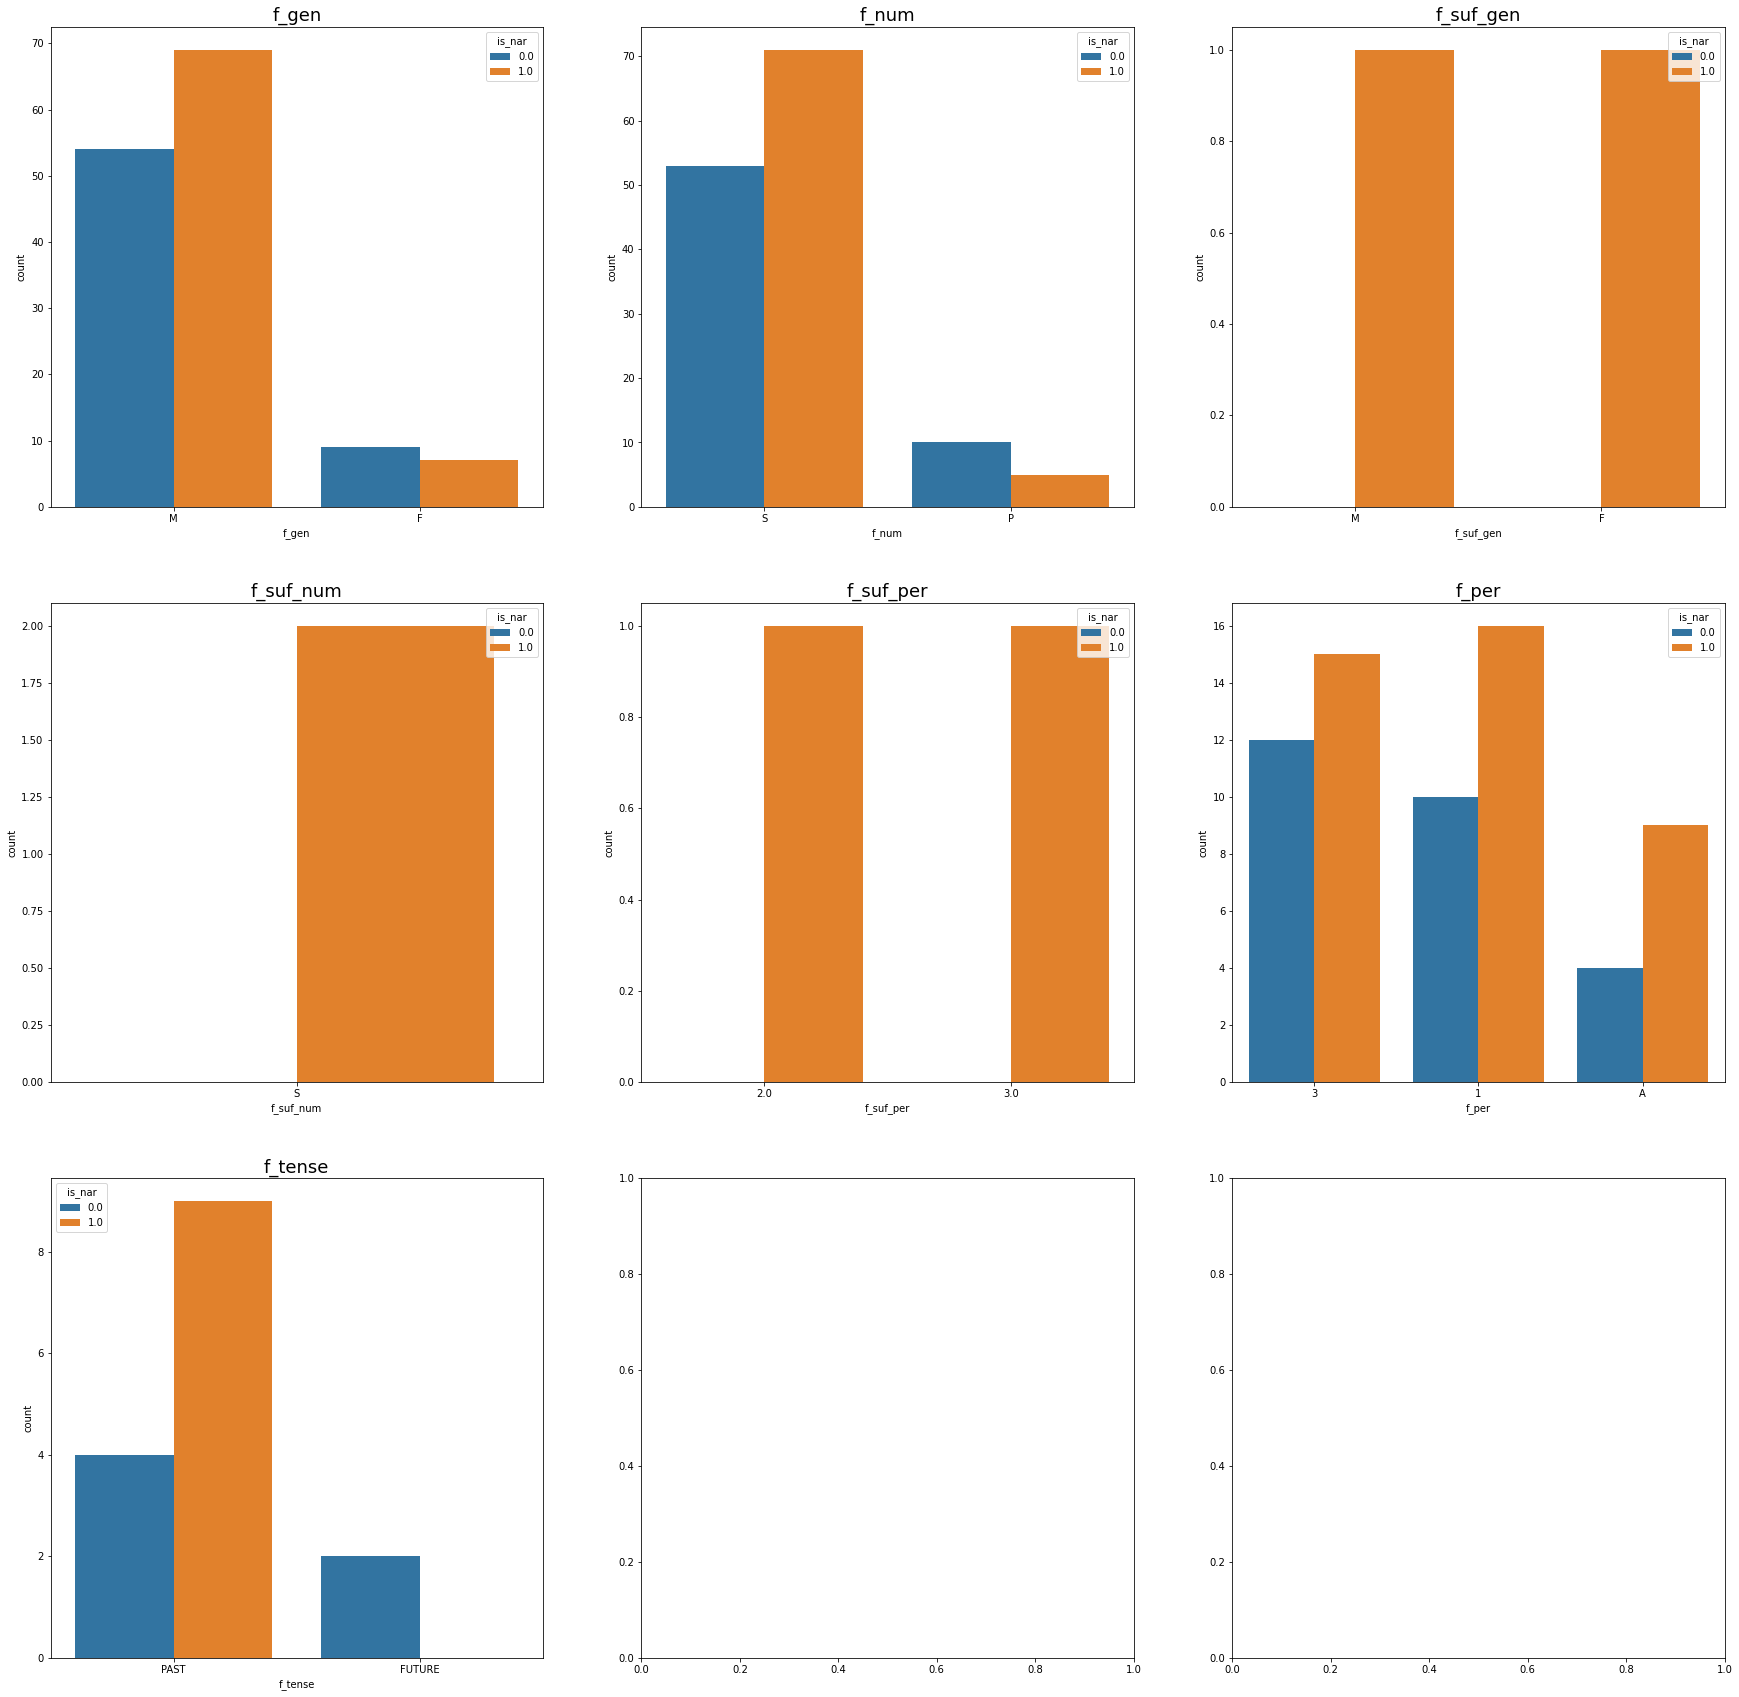

In [100]:
plot_num = len(columns_to_count)
fig, axes = plt.subplots(3, 3, figsize=(30,30))
for i,col in enumerate(columns_to_count[1:]):
    ax = axes.ravel()[i]
    sns.countplot(x=col,hue='is_nar', data=merged_raw,ax=ax)
#     df.boxplot('SalePrice',r2_scores[i,0], ax=ax) #TBD add weigths on X axis
    ax.set_title("{}".format(col), fontsize=18)

<AxesSubplot:xlabel='POSTAG'>

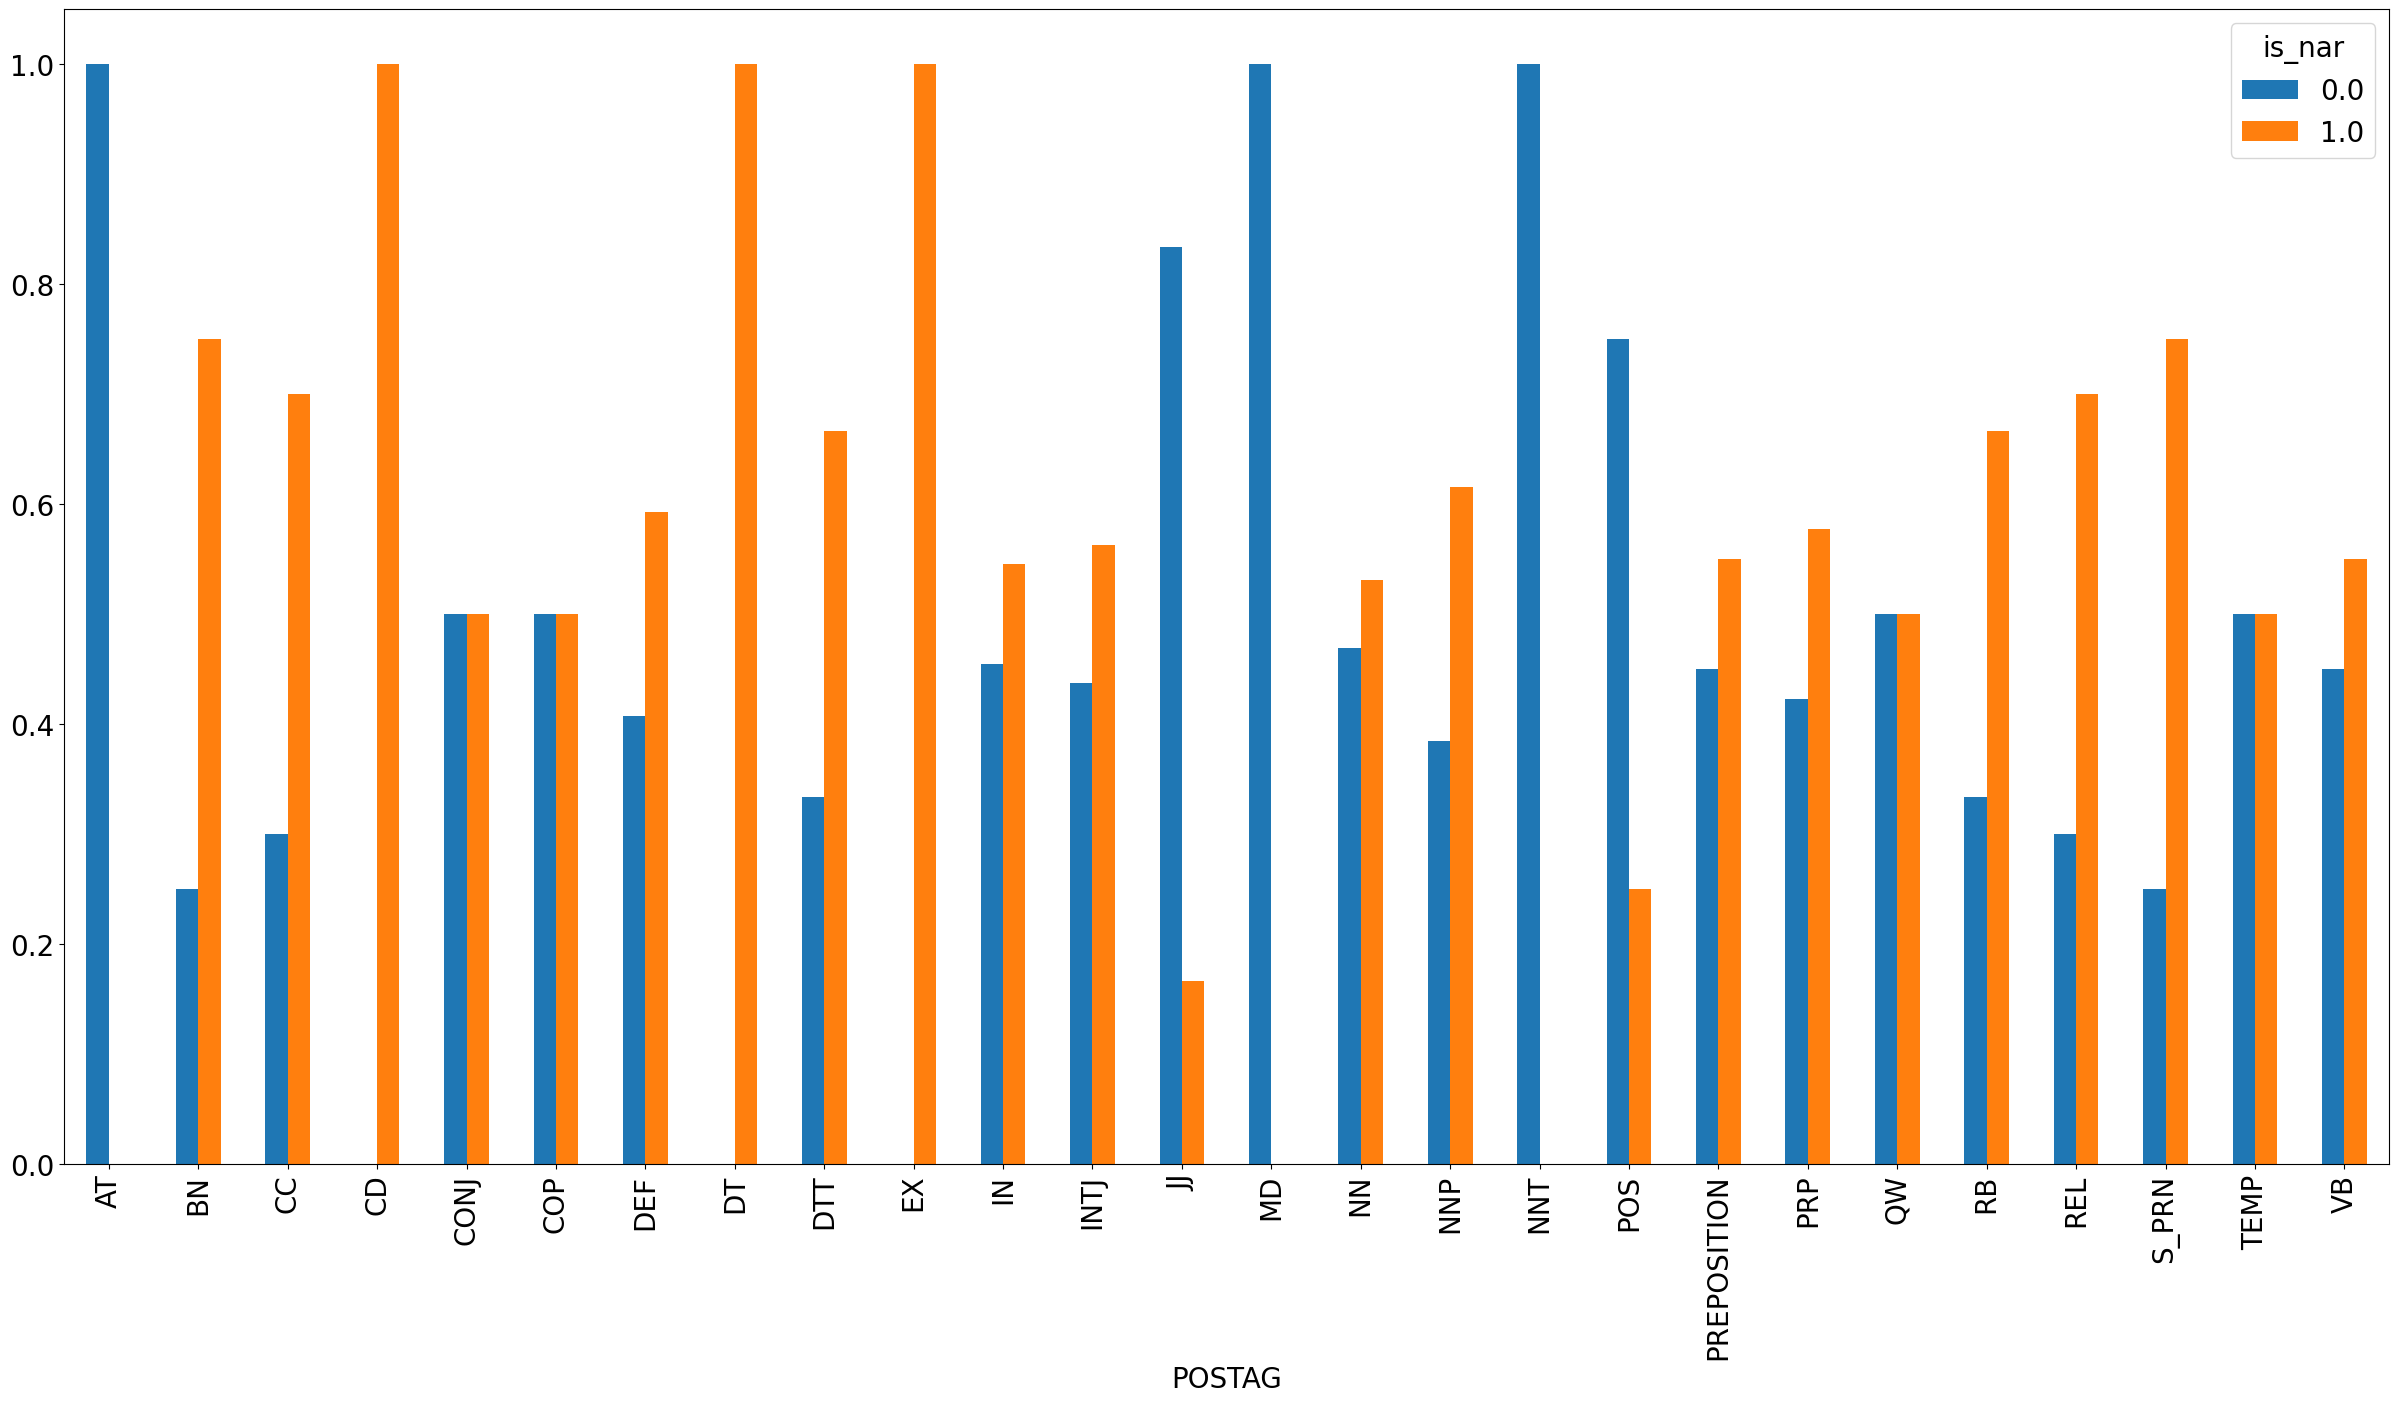

In [133]:
plt.rcParams.update({'font.size': 20})
fig, ax = plt.subplots(1, figsize=(30,15))
merged_raw.groupby([columns_to_count[0]])['is_nar'].value_counts(normalize=True).unstack().plot(kind='bar',ax=ax)

In [155]:
tags = merged_raw[columns_to_count[0]].unique()

In [156]:
imp.reload(defines)
imp.reload(feature_utils)
for tag in tags:
    print("{} : {}".format(tag,feature_utils.get_yap_tag_description(tag)))

NNT : Noun in construct state form
INTJ : Interjection
NNP : Proper noun
QW : WH words like when, where and how, which do not appear in a determiner position
DEF : Determiner
NN : NOUN
PREPOSITION : PREPOSITION
REL : The relativizers she, aher and ha (=that)
JJ : The construct state form of adjectives (like pitiless)
RB : Adverb
COP : Auxiliary verb = cop
CC : Coordinating conjunction
PRP : Personal pronoun
VB : A verb
IN : Preposition
DTT : definite article
TEMP : TEMP
CONJ : conjunction
BN : VERB-VerbForm=Part
EX :  VERB-HebExistential=True
DT : definite article
POS : Possessive item
S_PRN : Declarative sentence Parenthetical
AT : Accusative marker
CD : Numeral
MD : Modal


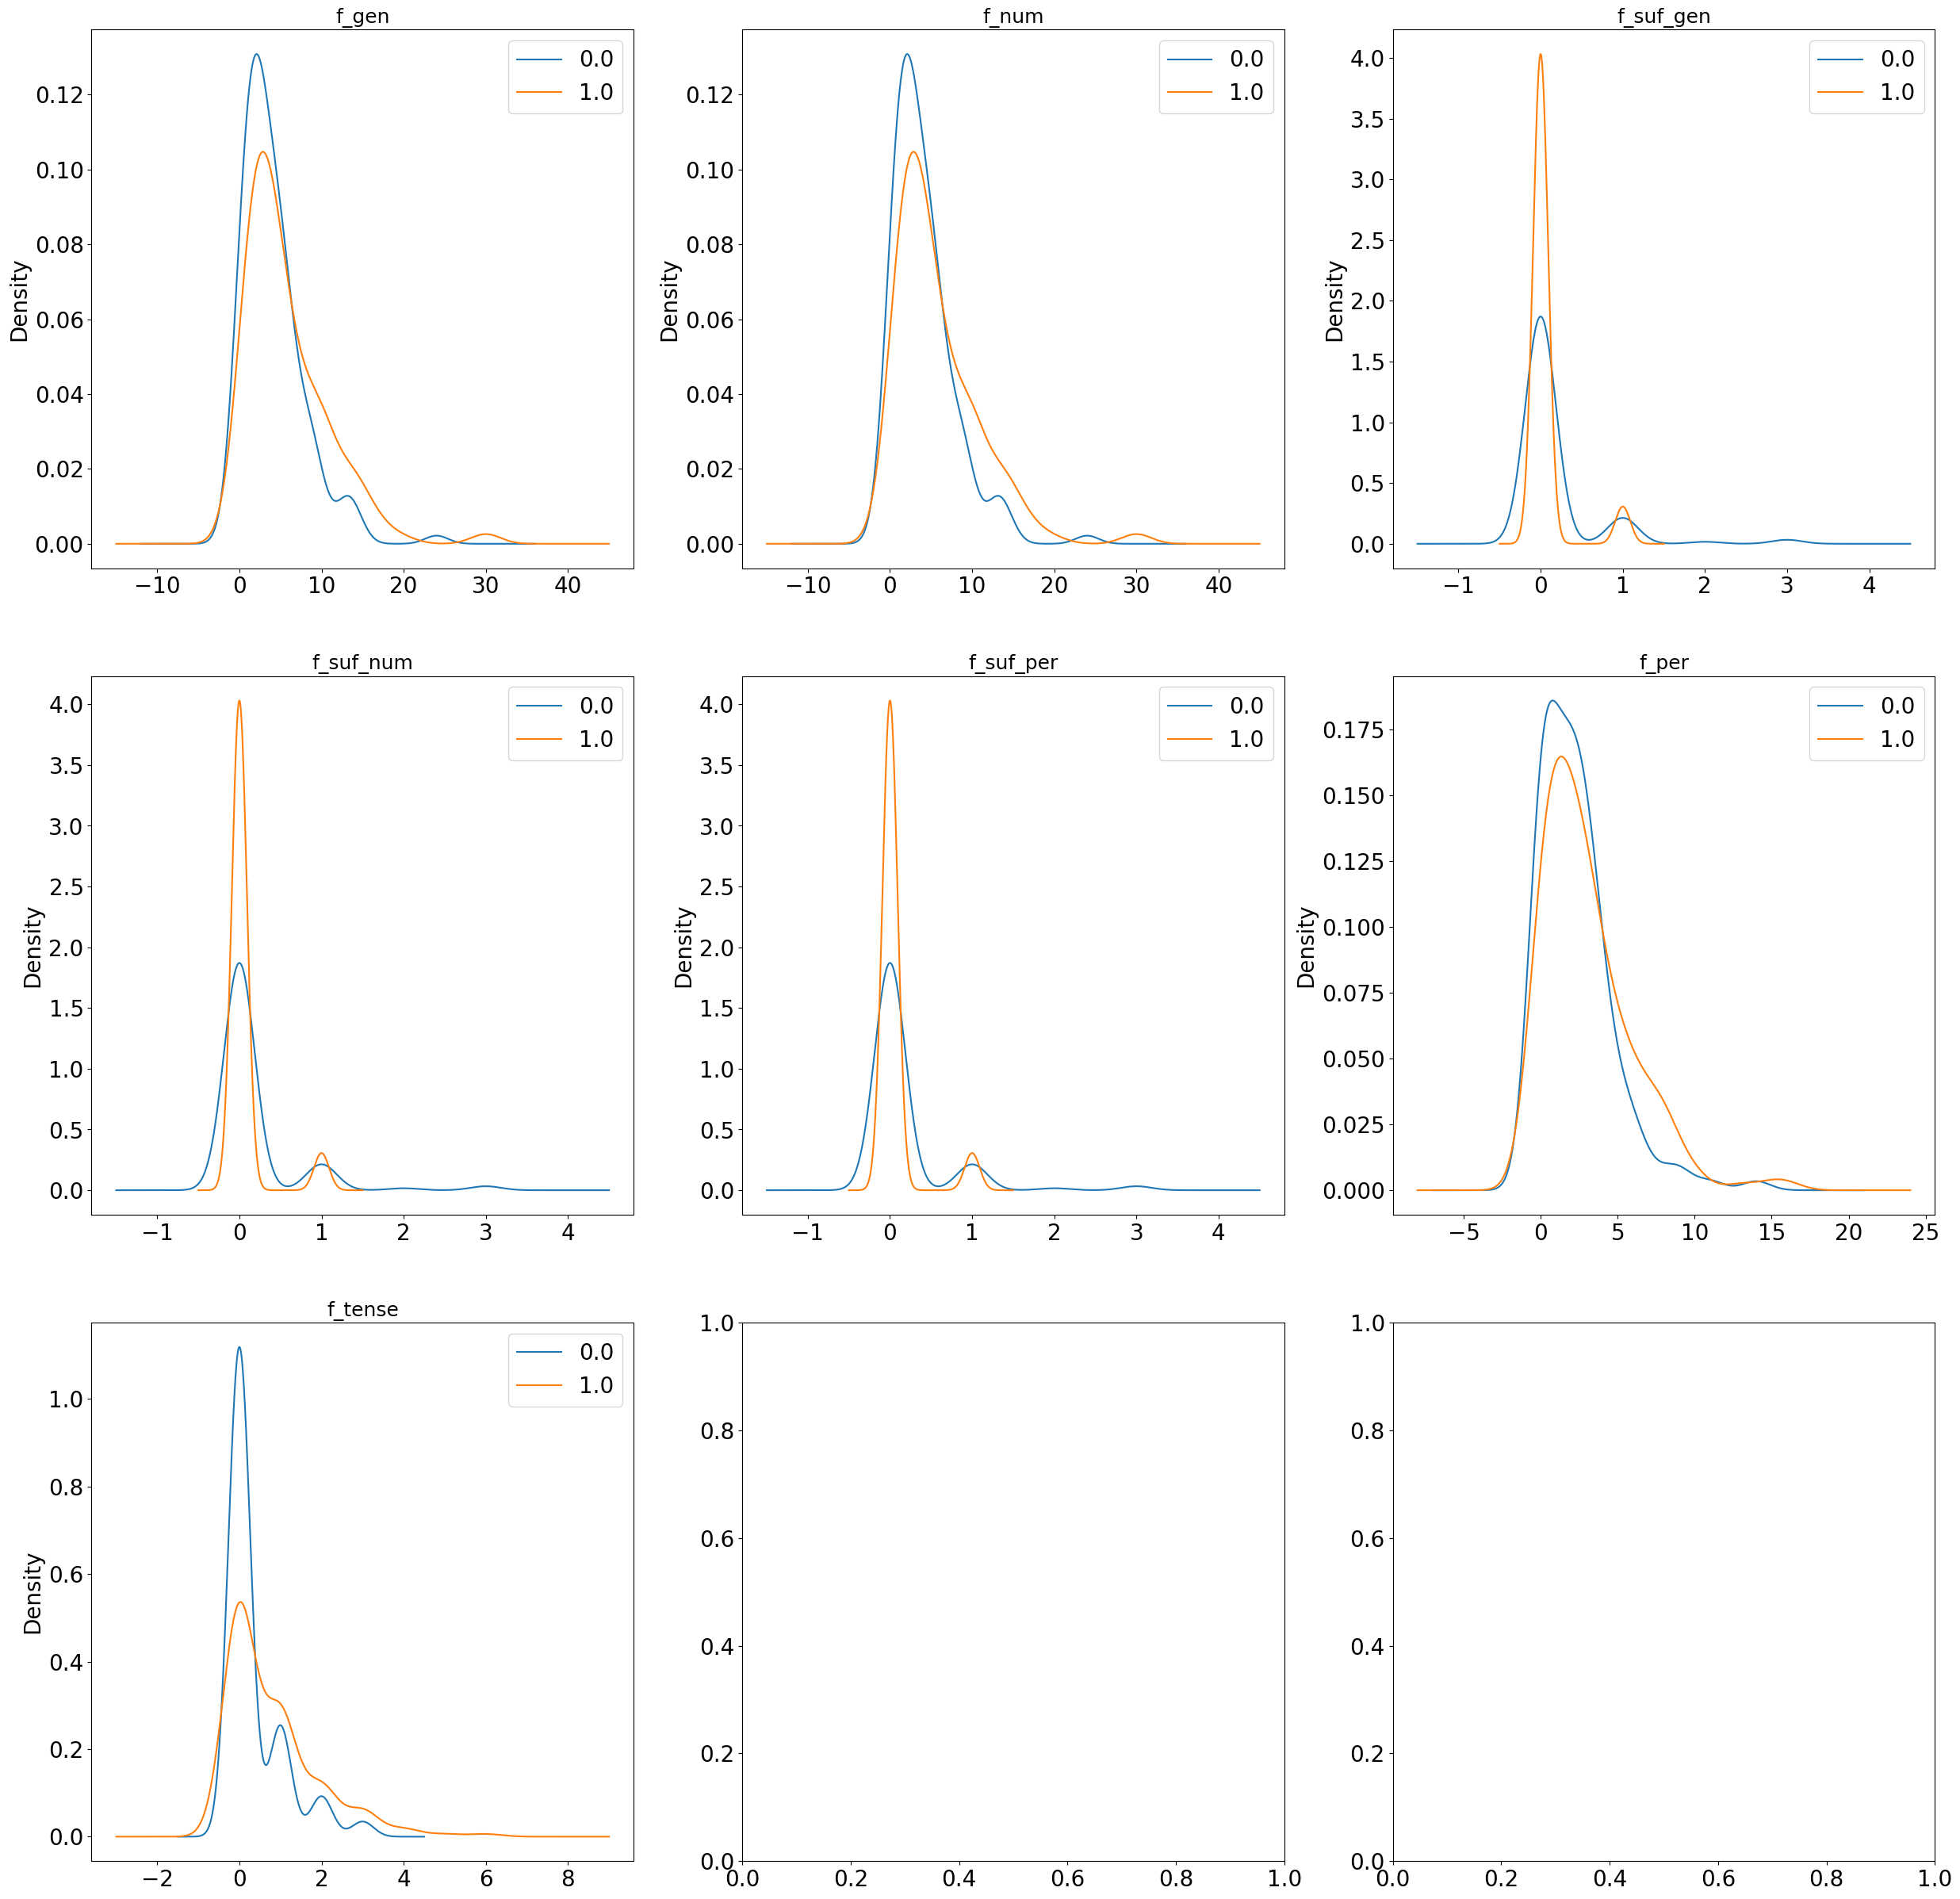

In [171]:
fig, axes = plt.subplots(3, 3, figsize=(30,30))
for i,col in enumerate(columns_to_count[1:]):
    ax = axes.ravel()[i]
    merged.groupby('is_nar')[col].plot(ax=ax,kind='kde',legend=True)#     df.boxplot('SalePrice',r2_scores[i,0], ax=ax) #TBD add weigths on X axis
    ax.set_title("{}".format(col), fontsize=18)
# merged.groupby('is_nar').plot(ax=ax,kind='kde',legend=True)

In [86]:
# Feature set
def word2features(sent_idx,word_idx):
    sent_len = sent_tokens_db[sent_tokens_db['sent_idx']==sent_idx]['TOKEN'].max()
    word_row = sent_tokens_db.query("sent_idx==  @sent_idx and TOKEN == @word_idx")

    features = {
#         'bias': 1.0,
        'word':word_row['LEMMA'].item(),
        'postag': word_row['POSTAG'].item(),
        'gen': word_row['f_suf_gen'].item(),
        'num': word_row['f_suf_num'].item(),
        'suf_per': word_row['f_suf_per'].item(),
        'per': word_row['f_per'].item(),
        'tense': word_row['f_tense'].item(),
    }
    if word_idx > 1:
        one_before_idx = word_idx-1
        word_row = sent_tokens_db.query("sent_idx==  @sent_idx and TOKEN == @one_before_idx")
        features.update({
            '-1:word':word_row['LEMMA'].item(),
        '-1:postag': word_row['POSTAG'].item(),
        '-1:gen': word_row['f_suf_gen'].item(),
        '-1:num':word_row['f_suf_num'].item(),
        '-1:suf_per': word_row['f_suf_per'].item(),
        '-1:per': word_row['f_per'].item(),
        '-1:tense': word_row['f_tense'].item(),
        })
    else:
        features['BOS'] = True
    
    if word_idx > 2:
        two_before_idx = word_idx-2
        word_row = sent_tokens_db.query("sent_idx==  @sent_idx and TOKEN == @two_before_idx")
        features.update({
            '-2:word':word_row['LEMMA'].item(),
        '-2:postag': word_row['POSTAG'].item(),
        '-2:gen':word_row['f_suf_gen'].item(),
        '-2:num':word_row['f_suf_num'].item(),
        '-2:suf_per': word_row['f_suf_per'].item(),
        '-2:per': word_row['f_per'].item(),
        '-2:tense': word_row['f_tense'].item(),
        })

    if word_idx < sent_len:
        one_after_idx = word_idx+1
        word_row =  sent_tokens_db.query("sent_idx==  @sent_idx and TOKEN == @one_after_idx")
        features.update({
            '+1:word':word_row['LEMMA'].item(),
        '+1:postag': word_row['POSTAG'].item(),
        '+1:gen': word_row['f_suf_gen'].item(),
        '+1:num': word_row['f_suf_num'].item(),
        '+1:suf_per': word_row['f_suf_per'].item(),
        '+1:per': word_row['f_per'].item(),
        '+1:tense': word_row['f_tense'].item(),
        })
    else:
        features['EOS'] = True

    return features

def sent2features(sent_idx):
    return [word2features(sent_idx,word_idx) for word_idx in sent_tokens_db[sent_tokens_db['sent_idx']==sent_idx]['TOKEN']]


# def sent2labels(sent):
#     return [sent_tokens_db.iloc[word,'is_nar'] for word in sent_tokens_db.index]
#Creating the train and test set
X = [sent2features(sent_idx) for sent_idx in sent_tokens_db['sent_idx'].unique()[:1]]
# y = [sent2labels(s) for s in sentences]
# X = [sent2features(1)]

In [87]:
X

[[{'word': 'טוב',
   'postag': 'NNT',
   'gen': nan,
   'num': nan,
   'suf_per': nan,
   'per': nan,
   'tense': nan,
   'BOS': True,
   '+1:word': 'אהלן',
   '+1:postag': 'INTJ',
   '+1:gen': nan,
   '+1:num': nan,
   '+1:suf_per': nan,
   '+1:per': nan,
   '+1:tense': nan},
  {'word': 'אהלן',
   'postag': 'INTJ',
   'gen': nan,
   'num': nan,
   'suf_per': nan,
   'per': nan,
   'tense': nan,
   '-1:word': 'טוב',
   '-1:postag': 'NNT',
   '-1:gen': nan,
   '-1:num': nan,
   '-1:suf_per': nan,
   '-1:per': nan,
   '-1:tense': nan,
   '+1:word': 'נ',
   '+1:postag': 'NNP',
   '+1:gen': nan,
   '+1:num': nan,
   '+1:suf_per': nan,
   '+1:per': nan,
   '+1:tense': nan},
  {'word': 'נ',
   'postag': 'NNP',
   'gen': nan,
   'num': nan,
   'suf_per': nan,
   'per': nan,
   'tense': nan,
   '-1:word': 'אהלן',
   '-1:postag': 'INTJ',
   '-1:gen': nan,
   '-1:num': nan,
   '-1:suf_per': nan,
   '-1:per': nan,
   '-1:tense': nan,
   '-2:word': 'טוב',
   '-2:postag': 'NNT',
   '-2:gen': nan,
 

In [193]:
def seq2features(seq_idx):
    seq = []
    for s in range(seq_idx,seq_idx+seq_len):
         seq.extend(sent2features(s))
    return seq

def seq2labels(seq_idx):
    seq = []
    for s in range(seq_idx,seq_idx+seq_len):
        label = sent2labels(s)
        seq.extend([label for i in range(vec_dim)]) # 2 - for 2 more featues EOS and BOS
    return seq

In [195]:
X[0], y[0]

(['v0',
  'v1',
  'v2',
  'v3',
  'v4',
  'v5',
  'v6',
  'v7',
  'v8',
  'v9',
  'v10',
  'v11',
  'v12',
  'v13',
  'v14',
  'v15',
  'v16',
  'v17',
  'v18',
  'v19',
  'v20',
  'v21',
  'v22',
  'v23',
  'v24',
  'v25',
  'v26',
  'v27',
  'v28',
  'v29',
  'v30',
  'v31',
  'v32',
  'v33',
  'v34',
  'v35',
  'v36',
  'v37',
  'v38',
  'v39',
  'v40',
  'v41',
  'v42',
  'v43',
  'v44',
  'v45',
  'v46',
  'v47',
  'v48',
  'v49',
  'v50',
  'v51',
  'v52',
  'v53',
  'v54',
  'v55',
  'v56',
  'v57',
  'v58',
  'v59',
  'v60',
  'v61',
  'v62',
  'v63',
  'v64',
  'v65',
  'v66',
  'v67',
  'v68',
  'v69',
  'v70',
  'v71',
  'v72',
  'v73',
  'v74',
  'v75',
  'v76',
  'v77',
  'v78',
  'v79',
  'v80',
  'v81',
  'v82',
  'v83',
  'v84',
  'v85',
  'v86',
  'v87',
  'v88',
  'v89',
  'v90',
  'v91',
  'v92',
  'v93',
  'v94',
  'v95',
  'v96',
  'v97',
  'v98',
  'v99',
  'BOS',
  'v0',
  'v1',
  'v2',
  'v3',
  'v4',
  'v5',
  'v6',
  'v7',
  'v8',
  'v9',
  'v10',
  'v11',
  '

In [196]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [197]:
len(X_train), len(y_train), len(X_test), len(y_test)

(469, 469, 231, 231)

In [198]:
# from sklearn.metrics import make_scorer
# from sklearn_crfsuite import metrics
# f1_scorer = make_scorer(metrics.flat_f1_score, average='macro') 
from sklearn.model_selection import cross_validate

crf = CRF(
    algorithm='lbfgs',
    c1=0.1,
    c2=0.1,
    max_iterations=100,
#     all_possible_transitions=True,
)
try:
    crf.fit(X_train, y_train)
except AttributeError:
    pass
predictions = crf.predict(X_test)
# pred = cross_val_predict(estimator=crf, X=X_train, y=y_train, cv=5)
# scores = cross_validate(crf, X, y, scoring="f1_macro", cv=5)
# print(scores.test_score)

ValueError: The numbers of items and labels differ: |x| = 402, |y| = 408

In [171]:
predictions
# feature_utils.get_prediction_report(y_test,predictions)

[['v0',
  'v1',
  'v2',
  'v3',
  'v4',
  'v5',
  'v6',
  'v7',
  'v8',
  'v9',
  'v10',
  'v11',
  'v12',
  'v13',
  'v14',
  'v15',
  'v16',
  'v17',
  'v18',
  'v19',
  'v20',
  'v21',
  'v22',
  'v23',
  'v24',
  'v25',
  'v26',
  'v27',
  'v28',
  'v29',
  'v30',
  'v31',
  'v32',
  'v33',
  'v34',
  'v35',
  'v36',
  'v37',
  'v38',
  'v39',
  'v40',
  'v41',
  'v42',
  'v43',
  'v44',
  'v45',
  'v46',
  'v47',
  'v48',
  'v49',
  'v50',
  'v51',
  'v52',
  'v53',
  'v54',
  'v55',
  'v56',
  'v57',
  'v58',
  'v59',
  'v60',
  'v61',
  'v62',
  'v63',
  'v64',
  'v65',
  'v66',
  'v67',
  'v68',
  'v69',
  'v70',
  'v71',
  'v72',
  'v73',
  'v74',
  'v75',
  'v76',
  'v77',
  'v78',
  'v79',
  'v80',
  'v81',
  'v82',
  'v83',
  'v84',
  'v85',
  'v86',
  'v87',
  'v88',
  'v89',
  'v90',
  'v91',
  'v92',
  'v93',
  'v94',
  'v95',
  'v96',
  'v97',
  'v98',
  'v99',
  'BOS',
  'v0',
  'v1',
  'v2',
  'v3',
  'v4',
  'v5',
  'v6',
  'v7',
  'v8',
  'v9',
  'v10',
  'v11',
  '

In [51]:
sent_vec_db

,0,1,2,3,4,5,6,7,8,9,...,292,293,294,295,296,297,298,299,is_nar,sent_len
0,-0.114521,0.000108,0.036471,-0.024207,0.002051,0.014730,-0.104159,0.058651,0.005404,0.056529,...,-0.002414,0.039244,-0.094238,0.025045,0.097398,-0.004409,0.041561,-0.049388,0.0,9.0
1,-0.013333,0.000648,0.013545,-0.001843,0.037912,0.044653,-0.033737,0.020353,-0.039255,0.040033,...,0.038335,0.013976,-0.062025,-0.025751,-0.032749,0.038144,-0.012054,0.083821,0.0,7.0
2,-0.049959,0.006207,0.019215,-0.013564,-0.006140,-0.020194,-0.021590,0.033078,0.043775,0.076063,...,-0.021449,-0.031051,-0.009857,0.012590,0.040845,-0.031004,0.001470,-0.049673,0.0,6.0
3,-0.009683,0.047087,0.037459,0.019149,0.005652,-0.042241,0.013978,0.052192,-0.023080,0.002327,...,-0.029806,0.033418,-0.029150,0.014673,0.022372,0.058281,0.031803,-0.026994,0.0,18.0
4,0.060957,0.005640,-0.018319,-0.002478,0.010457,-0.024910,0.091064,0.000475,0.066396,-0.038925,...,-0.024806,-0.046600,-0.026737,-0.015007,0.005086,0.030338,0.038523,-0.014919,0.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2834,0.044579,0.024742,0.028893,-0.060388,0.039829,0.025243,-0.117620,-0.028324,0.013425,-0.002992,...,-0.027126,-0.003454,-0.037883,0.018410,0.046375,0.052125,-0.023152,0.060160,0.0,3.0
2835,0.017902,0.038459,-0.016246,-0.003681,-0.026354,0.042227,0.019360,0.023875,-0.001420,0.015527,...,-0.022408,0.012324,-0.014626,0.004259,0.006237,0.035307,0.027554,-0.016158,0.0,30.0
2836,0.013650,0.023375,0.017228,0.000760,0.006687,0.010800,-0.005754,0.013923,0.009729,0.018878,...,-0.015082,0.006376,-0.010457,0.021521,-0.011850,0.022129,0.016181,0.004594,0.0,37.0
2837,0.009727,0.017978,0.027529,0.006578,0.020192,-0.020603,0.027635,0.017854,0.040842,0.017801,...,-0.019581,-0.002811,-0.012890,0.033547,0.007128,-0.002388,0.006980,-0.007728,0.0,23.0
